----

### **Assignment** : Advance Machine learning - Assignment 2 

---



  **Topic**: Convolution Networks (convnets) to Image Data 

  **Author**:  Khushboo Yadav

  **Date**:  Apr 10,2021

----

### **Introduction**

 
**Data :**

 The cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets.  We want to achieve **high** accuracy. We will be training our models on less than 10% of the data that was available to the competitors. This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed).

 We will classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Our computers will find it a bit more difficult.

 **CNN:**

A convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.[1] They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on the shared-weight architecture of the convolution kernels that shift over input features and provide translation equivariant responses.

Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1.
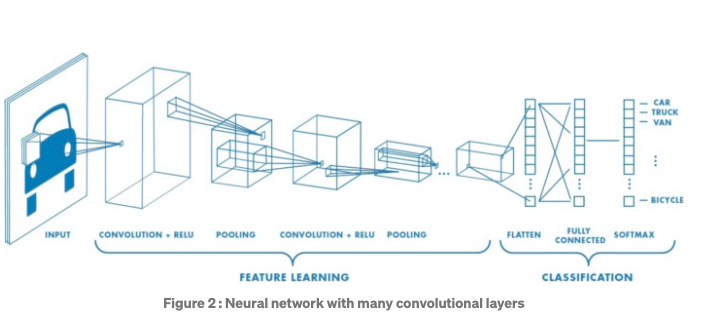


###**Goal**

+ Training a network from scratch, versus using a pretrained convnet. 
+ Use techniques to reduce overfitting and improve performance in developing a network that you train from scratch.
+ To understand relationship between training sample size and choice of network.

###**Approach**


Below is the pictorial representation of the approach we will be following:
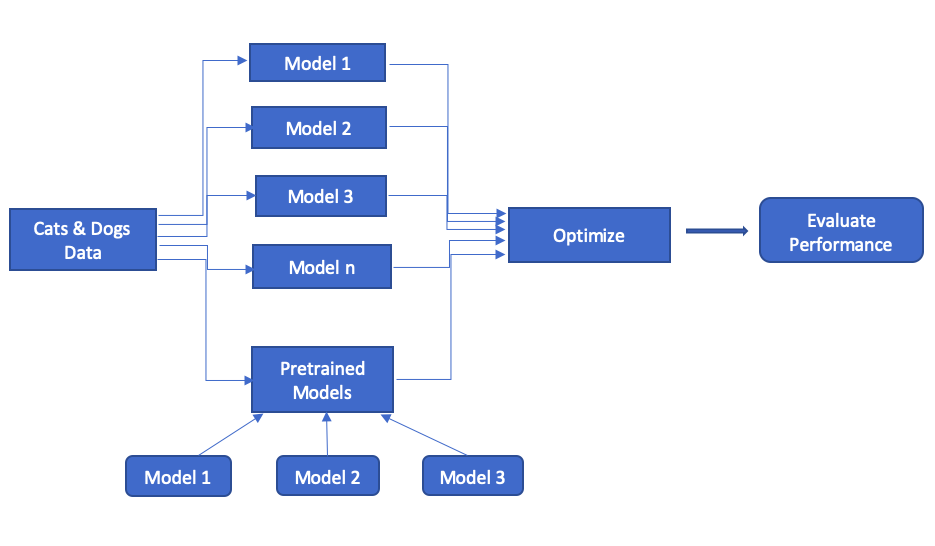

In [ ]:
#mounting google drive to access files/folders
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

 **Part I** : Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

 **1.1 Data Creation**
 
 After downloading and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

 Below is the snapshot explaining, how we want to segregate the data.

 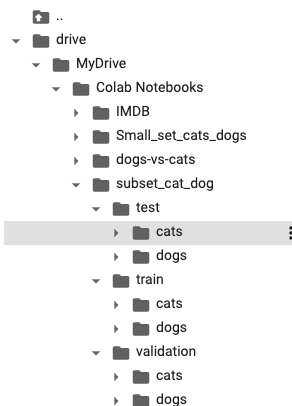





 


In [ ]:
import keras
keras.__version__
import os, shutil
import tensorflow as tf

# The path to the directory where the original
# dataset was uncompressed and stored in google drive/local desktop
# These files are huge and we would be using a subset of these to understand model

original_dataset_dir = 'drive/MyDrive/Colab Notebooks/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = 'drive/MyDrive/Colab Notebooks/subset_cat_dog'
os.mkdir(base_dir)


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(500, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(500, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(750, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


#Total images for cats and dogs categories :

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 500
total training dog images: 500
total validation cat images: 250
total validation dog images: 250
total test cat images: 250
total test dog images: 250


**1.2 Building The Network**



Since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage.
 This serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150x150 (a somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the Flatten layer.



**1.3 Data preprocessing**

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

+ Read the picture files.
+ Decode the JPEG content to RBG grids of pixels.
+ Convert these into floating point tensors.
+ Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).


 Keras contains the class ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. 





Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 22s 111ms/step - loss: 0.6961 - acc: 0.5368 - val_loss: 0.6823 - val_acc: 0.5280
Epoch 2/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6716 - acc: 0.5894 - val_loss: 0.6542 - val_acc: 0.6200
Epoch 3/20
50/50 [==============================] - 5s 103ms/step - loss: 0.6336 - acc: 0.6374 - val_loss: 0.6302 - val_acc: 0.6560
Epoch 4/20
50/50 [==============================] - 5s 103ms/step - loss: 0.6146 - acc: 0.6555 - val_loss: 0.6077 - val_acc: 0.6420
Epoch 5/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5505 - acc: 0.7284 - val_loss: 0.5804 - val_acc: 0.6940
Epoch 6/20
50/50 [==============================] - 5s 102ms/step - loss: 0.4954 - acc: 0.7674 - val_loss: 0.5745 - val_acc: 0.6840
Epoch 7/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5191 - acc: 0.7405 - val_loss: 0.5707 - val_acc: 0.6980
Epoch 8/20
50/50 [==============================] - 5s 107ms/step - loss: 0.4913 - acc

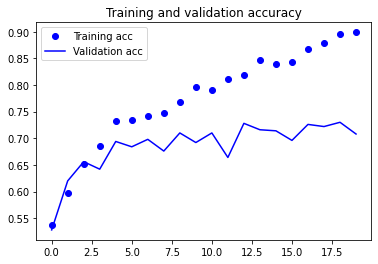

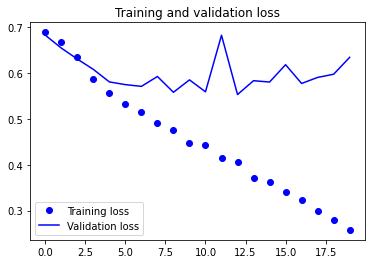

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Val acc: 0.7080000042915344
Val loss: 0.6339644193649292
train_acc: 0.9269999861717224
train_loss: 0.20915786921977997


In [ ]:

#Building original Model network

from keras import layers
from keras import models
import random

random.seed(100)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#Data pre-processing: Decode the JPEG content,convert them into tensors,rescale the pixel

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

    random.seed(123)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

#Saving the new model 
model.save('cats_and_dogs_small_1.h5')

# Plotting the loss and accuracy of the model over the training and validation data during training:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of loss and accuracy

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print('Val acc:', val_acc)
print('Val loss:', val_loss)
train_loss, train_acc = model.evaluate_generator(train_generator, steps=50)
print('train_acc:',train_acc)
print('train_loss:',train_loss)

**Observation:**
+ We can see the signs of overfitting based on the above.
 + Training accuracy increases linearly over time, until it reaches 96%, while our validation accuracy stalls at 70%.
 + Our validation loss shows huge difference in comparison to training loss.

+ We will be using  regularization techniques with data augmentation to solve the problem of overfitting.



**1.4 Reduce Overfitting**
+ Data Augmentation is used almost universally when processing images with deep learning models.
 + Some of the popular image augmentation techniques are flipping, translation, rotation, scaling, changing brightness, adding noise .

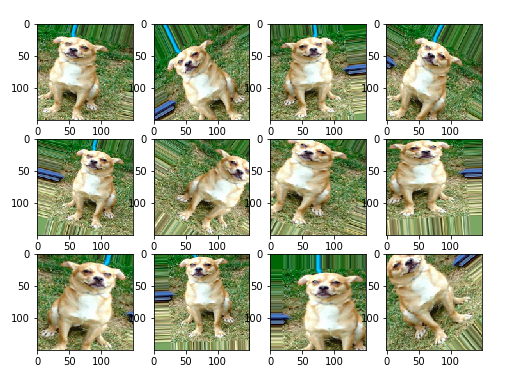

 Most computer vision tasks require lots of data and data augmentation is one of the techniques used to improve the performance of computer vision systems. The computer vision is a pretty complicated task. For an input image the algorithm has to find a pattern to understand what is in the picture.

In practice, having more data will help for almost all computer vision tasks. 
By using data augmentation a lot of similar images can be generated. This helps in increasing the dataset size and thus reduce overfitting.

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 10s 187ms/step - loss: 0.7016 - acc: 0.4668 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 9s 185ms/step - loss: 0.6870 - acc: 0.5108 - val_loss: 0.8079 - val_acc: 0.5000
Epoch 3/20
50/50 [==============================] - 9s 182ms/step - loss: 0.6915 - acc: 0.5413 - val_loss: 0.6627 - val_acc: 0.5780
Epoch 4/20
50/50 [==============================] - 9s 183ms/step - loss: 0.6822 - acc: 0.5628 - val_loss: 0.6590 - val_acc: 0.6000
Epoch 5/20
50/50 [==============================] - 9s 183ms/step - loss: 0.6681 - acc: 0.5788 - val_loss: 0.6559 - val_acc: 0.5920
Epoch 6/20
50/50 [==============================] - 9s 183ms/step - loss: 0.6493 - acc: 0.6145 - val_loss: 0.7107 - val_acc: 0.5360
Epoch 7/20
50/50 [==============================] - 9s 183ms/step - loss: 0.6519 - acc: 0.6196 - val_loss: 0.6621 - val_acc: 0.5920
Epoch 8/20
50/50 [==============================] - 9s 184ms/step - loss: 0

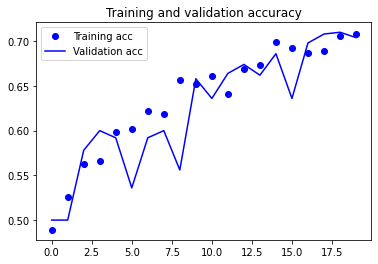

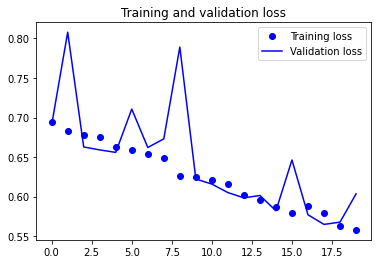

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Val acc: 0.7039999961853027
Val loss: 0.6033458709716797
train_acc: 0.7020000219345093
train_loss: 0.5585858225822449
Found 500 images belonging to 2 classes.
test acc: 0.6499999761581421
test loss: 0.6273735165596008


In [ ]:
#Data Augumentation - handling overfitting with dropouts
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


random.seed(201)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

random.seed(440)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# Data Preprocessing: decode JPEG format to RGB grid of pixels , convert to floating point tensor and rescaling the pixel values to [0,1]

# Note that the validation data should not be augmented! 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), # image resized to 150*150
        batch_size=20,
        class_mode='binary')# binary labels

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

#saving the model
model.save('cats_and_dogs_small_2.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plotting  accuracy and loss for training and validation datset
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of loss and accuracy

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print('Val acc:', val_acc)
print('Val loss:', val_loss)
train_loss, train_acc = model.evaluate_generator(train_generator, steps=50)
print('train_acc:',train_acc)
print('train_loss:',train_loss)

# Evaluating model on the test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

----

**Observations:**

+ Based on the above results  can see that the problem of overfitting has been reduced by using data augmentation and dropout techniques.
 + Training accuracy and loss are quite close to the validation accuracy and loss in the chart. 
 + We can see some improvement from the non-regularized model in terms of overfitting.
 + Validation accuracy = 70% and Validation loss=60%.
 + Test accuracy = 65% test loss= 62%

+ There is still some room for improvement in terms of performance , we will try to incerease the sample size of the train data and validate the performance.
----
----



**Part 2.** Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

Here, we will increase the sample size of the training dataset  from 1000 to 2000(double) and rest will be the same.By doing so, we can understand if there is some improvement in the model.

**2.1 Data Creation**

In [ ]:

base_dir2 = 'drive/MyDrive/Colab Notebooks/subset_cat_dog2'
os.mkdir(base_dir2)


# Directories for our training,
# validation and test splits
train_dir2 = os.path.join(base_dir2, 'train')
os.mkdir(train_dir2)
validation_dir2 = os.path.join(base_dir2, 'validation')
os.mkdir(validation_dir2)
test_dir2 = os.path.join(base_dir2, 'test')
os.mkdir(test_dir2)

# Directory with our training cat pictures
train_cats_dir2 = os.path.join(train_dir2, 'cats')
os.mkdir(train_cats_dir2)

# Directory with our training dog pictures
train_dogs_dir2 = os.path.join(train_dir2, 'dogs')
os.mkdir(train_dogs_dir2)

# Directory with our validation cat pictures
validation_cats_dir2 = os.path.join(validation_dir2, 'cats')
os.mkdir(validation_cats_dir2)

# Directory with our validation dog pictures
validation_dogs_dir2 = os.path.join(validation_dir2, 'dogs')
os.mkdir(validation_dogs_dir2)

# Directory with our validation cat pictures
test_cats_dir2 = os.path.join(test_dir2, 'cats')
os.mkdir(test_cats_dir2)

# Directory with our validation dog pictures
test_dogs_dir2 = os.path.join(test_dir2, 'dogs')
os.mkdir(test_dogs_dir2)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir2, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir2, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir2, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir2, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir2, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir2, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir2)))
print('total training dog images:', len(os.listdir(train_dogs_dir2)))
print('total validation cat images:', len(os.listdir(validation_cats_dir2)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir2)))
print('total test cat images:', len(os.listdir(test_cats_dir2)))
print('total test dog images:', len(os.listdir(test_dogs_dir2)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 250
total validation dog images: 250
total test cat images: 250
total test dog images: 250


**2.2 Building Network and 2.3 Data preprocessing**

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
Epoch 1/20
50/50 [==============================] - 6s 111ms/step - loss: 0.6950 - acc: 0.5386 - val_loss: 0.6835 - val_acc: 0.5820
Epoch 2/20
50/50 [==============================] - 5s 105ms/step - loss: 0.6833 - acc: 0.5835 - val_loss: 0.6704 - val_acc: 0.6440
Epoch 3/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6753 - acc: 0.5771 - val_loss: 0.6515 - val_acc: 0.6040
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6409 - acc: 0.6500 - val_loss: 0.6424 - val_acc: 0.6480
Epoch 5/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6282 - acc: 0.6641 - val_loss: 0.6117 - val_acc: 0.6580
Epoch 6/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5888 - acc: 0.7092 - val_loss: 0.6234 - val_acc: 0.6400
Epoch 7/20
50/50 [==============================] - 5s 105ms/st

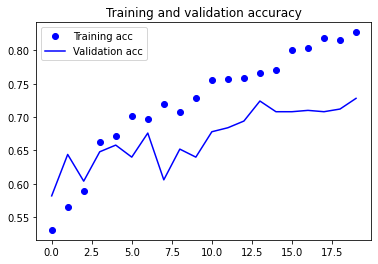

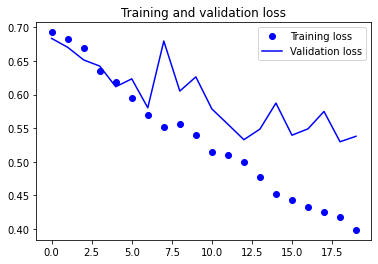

Val acc: 0.7279999852180481
Val loss: 0.5379037261009216
train_acc: 0.8619999885559082
train_loss: 0.34279826283454895


In [ ]:
#Building New Model Network - training sample increased

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


random.seed(100)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Preprocessing: decode JPEG format to RGB grid of pixels , convert to floating point tensor and rescaling the pixel values to [0,1]

# All images will be rescaled by 1./255
train_datagen2 = ImageDataGenerator(rescale=1./255)
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        # This is the target directory
        train_dir2,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # binary labels
        class_mode='binary')

validation_generator2 = test_datagen2.flow_from_directory(
        validation_dir2,
        target_size=(150, 150),# All image will be resized to 150*150
        batch_size=20,
        class_mode='binary') # binary labels


for data_batch, labels_batch in train_generator2:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

    random.seed(123)
history2 = model2.fit_generator(
      train_generator2,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator2,
      validation_steps=25)

# Plotting the loss and accuracy of the model over the training and validation data during training:

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation
val_loss2, val_acc2 = model2.evaluate_generator(validation_generator2, steps=50)
print('Val acc:', val_acc2)
print('Val loss:', val_loss2)
train_loss2, train_acc2 = model2.evaluate_generator(train_generator2, steps=50)
print('train_acc:',train_acc2)
print('train_loss:',train_loss2)




 **Observation:**
+ We can see the signs of overfitting based on the above evaluation.
 + Training accuracy increases linearly over time,  average 79%, while our validation accuracy stalls at 69%.
 + Our validation loss shows huge difference in comparison to training loss.

+ We will be using  regularization techniques with data augmentation to solve the problem of overfitting.



**1.4 Reduce Overfitting**
+ Data Augmentation is used almost universally when processing images with deep learning models.
 + Some of the popular image augmentation techniques are flipping, translation, rotation, scaling, changing brightness, adding noise .
 
By using data augmentation a lot of similar images can be generated. This helps in increasing the dataset size and thus reduce overfitting.


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 10s 189ms/step - loss: 0.7041 - acc: 0.5087 - val_loss: 0.6910 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 9s 188ms/step - loss: 0.6953 - acc: 0.4951 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 3/20
50/50 [==============================] - 9s 185ms/step - loss: 0.6940 - acc: 0.5117 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 4/20
50/50 [==============================] - 9s 187ms/step - loss: 0.6835 - acc: 0.5330 - val_loss: 0.6670 - val_acc: 0.5720
Epoch 5/20
50/50 [==============================] - 9s 187ms/step - loss: 0.6854 - acc: 0.5233 - val_loss: 0.6568 - val_acc: 0.5780
Epoch 6/20
50/50 [==============================] - 9s 186ms/step - loss: 0.6605 - acc: 0.5990 - val_loss: 0.6676 - val_acc: 0.5540
Epoch 7/20
50/50 [==============================] - 9s 185ms/step - loss: 0.6525 - acc: 0.6018 - val_loss: 0.6489 - val_acc:

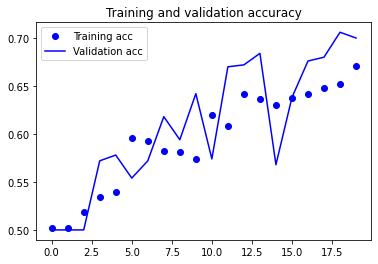

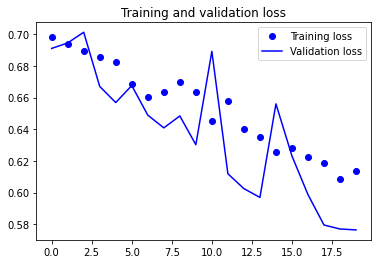

Val acc: 0.699999988079071
Val loss: 0.5764649510383606
train_acc: 0.7059999704360962
train_loss: 0.579839825630188
Found 500 images belonging to 2 classes.
test acc: 0.6759999990463257
test loss: 0.602074384689331


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#datagen = ImageDataGenerator(
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest')

random.seed(201)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


random.seed(440)
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented! #why?
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        # This is the target directory
        train_dir2,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator2 = test_datagen2.flow_from_directory(
        validation_dir2,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history2 = model2.fit_generator(
      train_generator2,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator2,
      validation_steps=25)

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

#Plotting  accuracy and loss for training and validation datset
plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation
val_loss2, val_acc2 = model2.evaluate_generator(validation_generator2, steps=50)
print('Val acc:', val_acc2)
print('Val loss:', val_loss2)
train_loss2, train_acc2 = model2.evaluate_generator(train_generator2, steps=50)
print('train_acc:',train_acc2)
print('train_loss:',train_loss2)

# Evaluating model on the test data
test_generator2 = test_datagen2.flow_from_directory(
        test_dir2,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss2, test_acc2 = model2.evaluate_generator(test_generator2, steps=50)
print('test acc:', test_acc2)
print('test loss:', test_loss2)

----

**Results:**

+ Based on the above results  can see that the problem of overfitting has been reduced by using data augmentation and dropout techniques.
 + Training accuracy and loss are quite close to the validation accuracy and loss in the chart. 
 + We can see some improvement from the non-regularized model in terms of overfitting.The variance has reduced.
 + Validation accuracy = 69.99%(almost 70 prcnt) and Validation loss=57%.
 + Test Accuracy= 67%,Test loss= 60%

+ It seems the performance has been improved as compared to the evaluated performance results of model 1 with training size=1000.

+ There is an improvement in the performance of the new model when we increased the size of the training sample to 2000.
+ Performance evaluation on test set, indicates that there is not much improvement .Therefore, it is needed to understand weather there will be some improvement in the performance by increasing the training size bit further.

Therefore , I would like to evaluate the performance by increasing the training size .

----
----


**Part 3:** Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

+ Since, there was an improvement in the performance by increasing the training sample size, I would like to evaluate the performance by increasing the sample size of the training dataset further.

**Model 3:**
* training = 3000 sample,
* validation = 500 sample,
* test = 500 sample

**3.1 Data Creation**

In [ ]:
#Model3
import warnings
warnings.filterwarnings("ignore")

# The directory where we will
# store our smaller dataset
base_dir3 = 'drive/MyDrive/Colab Notebooks/subset_cat_dog3'
os.mkdir(base_dir3)

# Directories for our training,
# validation and test splits
train_dir3 = os.path.join(base_dir3, 'train')
os.mkdir(train_dir3)
validation_dir3 = os.path.join(base_dir3, 'validation')
os.mkdir(validation_dir3)
test_dir3 = os.path.join(base_dir3, 'test')
os.mkdir(test_dir3)

# Directory with our training cat pictures
train_cats_dir3 = os.path.join(train_dir3, 'cats')
os.mkdir(train_cats_dir3)

# Directory with our training dog pictures
train_dogs_dir3 = os.path.join(train_dir3, 'dogs')
os.mkdir(train_dogs_dir3)

# Directory with our validation cat pictures
validation_cats_dir3 = os.path.join(validation_dir3, 'cats')
os.mkdir(validation_cats_dir3)

# Directory with our validation dog pictures
validation_dogs_dir3 = os.path.join(validation_dir3, 'dogs')
os.mkdir(validation_dogs_dir3)

# Directory with our validation cat pictures
test_cats_dir3 = os.path.join(test_dir3, 'cats')
os.mkdir(test_cats_dir3)

# Directory with our validation dog pictures
test_dogs_dir3 = os.path.join(test_dir3, 'dogs')
os.mkdir(test_dogs_dir3)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir3, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 1750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir3, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1750, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir3, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir3, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 1750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir3, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1750, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir3, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir3)))
print('total training dog images:', len(os.listdir(train_dogs_dir3)))
print('total validation cat images:', len(os.listdir(validation_cats_dir3)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir3)))
print('total test cat images:', len(os.listdir(test_cats_dir3)))
print('total test dog images:', len(os.listdir(test_dogs_dir3)))

total training cat images: 1500
total training dog images: 1500
total validation cat images: 250
total validation dog images: 250
total test cat images: 250
total test dog images: 250


**3.2 Building Model and 3.3 Data Preprocessing** 

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
Epoch 1/20
50/50 [==============================] - 6s 107ms/step - loss: 0.7042 - acc: 0.5175 - val_loss: 0.6876 - val_acc: 0.5780
Epoch 2/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6880 - acc: 0.5806 - val_loss: 0.6762 - val_acc: 0.5940
Epoch 3/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6801 - acc: 0.5577 - val_loss: 0.6665 - val_acc: 0.6180
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6544 - acc: 0.6545 - val_loss: 0.6596 - val_acc: 0.6180
Epoch 5/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6348 - acc: 0.6811 - val_loss: 0.7355 - val_acc: 0.5220
Epoch 6/20
50/50 [==============================] - 5s 103ms/step - loss: 0.6264 - acc: 0.6657 - val_loss: 0.6696 - val_acc: 0.5860
Epoch 7/20
50/50 [==============================] - 5s 102ms/st

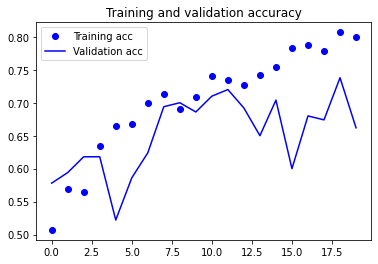

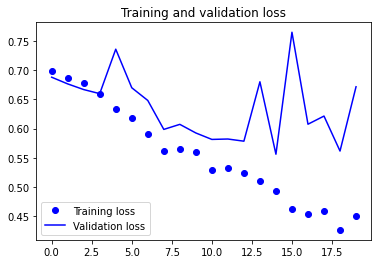

Val acc: 0.6620000004768372
Val loss: 0.6713210344314575
train_acc: 0.7509999871253967
train_loss: 0.4860256016254425


In [ ]:
#Building  Model 3 Network - training sample increased
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

random.seed(678)
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Preprocessing: decode JPEG format to RGB grid of pixels , convert to floating point tensor and rescaling the pixel values to [0,1]

# All images will be rescaled by 1./255
train_datagen3 = ImageDataGenerator(rescale=1./255)
test_datagen3 = ImageDataGenerator(rescale=1./255)

train_generator3 = train_datagen3.flow_from_directory(
        # This is the target directory
        train_dir3,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # binary labels
        class_mode='binary')

validation_generator3 = test_datagen3.flow_from_directory(
        validation_dir3,
        target_size=(150, 150),# All image will be resized to 150*150
        batch_size=20,
        class_mode='binary') # binary labels


for data_batch, labels_batch in train_generator3:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

    random.seed(456)
history3 = model3.fit_generator(
      train_generator3,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator3,
      validation_steps=25)

# Plotting the loss and accuracy of the model over the training and validation data during training:

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc3))

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation
val_loss3, val_acc3 = model3.evaluate_generator(validation_generator3, steps=50)
print('Val acc:', val_acc3)
print('Val loss:', val_loss3)
train_loss3, train_acc3 = model3.evaluate_generator(train_generator3, steps=50)
print('train_acc:',train_acc3)
print('train_loss:',train_loss3)

**3.4 Reducing Overfitting**

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 10s 192ms/step - loss: 0.6964 - acc: 0.5153 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 9s 184ms/step - loss: 0.6891 - acc: 0.5315 - val_loss: 0.6886 - val_acc: 0.5180
Epoch 3/20
50/50 [==============================] - 9s 186ms/step - loss: 0.6846 - acc: 0.5457 - val_loss: 0.6821 - val_acc: 0.5840
Epoch 4/20
50/50 [==============================] - 9s 186ms/step - loss: 0.6806 - acc: 0.5576 - val_loss: 0.7027 - val_acc: 0.5100
Epoch 5/20
50/50 [==============================] - 9s 186ms/step - loss: 0.6730 - acc: 0.5823 - val_loss: 0.6789 - val_acc: 0.5720
Epoch 6/20
50/50 [==============================] - 9s 183ms/step - loss: 0.6853 - acc: 0.5802 - val_loss: 0.7008 - val_acc: 0.5060
Epoch 7/20
50/50 [==============================] - 9s 185ms/step - loss: 0.6722 - acc: 0.5813 - val_loss: 0.6640 - val_acc:

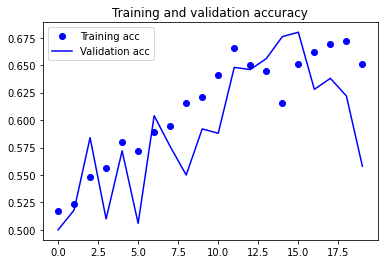

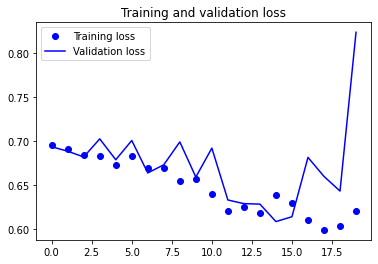

Val acc: 0.5580000281333923
Val loss: 0.8235973715782166
train_acc: 0.6209999918937683
train_loss: 0.6841486096382141
Found 500 images belonging to 2 classes.
test acc: 0.5600000023841858
test loss: 0.8359498381614685


In [ ]:
# model 3 data augumentation
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

random.seed(789)

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


random.seed(908)
train_datagen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented! #why?
test_datagen3 = ImageDataGenerator(rescale=1./255)

train_generator3 = train_datagen3.flow_from_directory(
        # This is the target directory
        train_dir3,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator3 = test_datagen3.flow_from_directory(
        validation_dir3,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history3 = model3.fit_generator(
      train_generator3,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator3,
      validation_steps=25)

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc3))

#Plotting  accuracy and loss for training and validation datset
plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation
val_loss3, val_acc3 = model3.evaluate_generator(validation_generator3, steps=50)
print('Val acc:', val_acc3)
print('Val loss:', val_loss3)
train_loss3, train_acc3 = model3.evaluate_generator(train_generator3, steps=50)
print('train_acc:',train_acc3)
print('train_loss:',train_loss3)

# Evaluating model on the test data
test_generator3 = test_datagen3.flow_from_directory(
        test_dir3,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss3, test_acc3 = model3.evaluate_generator(test_generator3, steps=50)
print('test acc:', test_acc3)
print('test loss:', test_loss3)

----

**Results:**

+ Based on the above results  can see that the problem of overfitting has been reduced by using data augmentation and dropout techniques.
 + Training accuracy and loss are quite close to the validation accuracy and loss in the chart. 
 + We can see some improvement from the non-regularized model in terms of overfitting.
 + Validation accuracy = 55% and Validation loss=82%.
 + Test Accuracy = 56% and Test loss = 83%
 + It seems that the performance has gone slightly down in comaprison to model 2(training sample=2000)for validation set.


Therefore , I would like to evaluate the performance by decreasing  the training sample size so that the training size will be 2000 < 3000.
Let's try with training sample size = 2500.


----
----

**Model 4 :**

*trainning = 2500 sample size,

*validation = 500 sample size,

*test = 500 sample size

**4.1 Data creation**


In [ ]:
# model 4
warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# The directory where we will
# store our smaller dataset
base_dir4 = 'drive/MyDrive/Colab Notebooks/subset_cat_dog4'
os.mkdir(base_dir4)

# Directories for our training,
# validation and test splits
train_dir4 = os.path.join(base_dir4, 'train')
os.mkdir(train_dir4)
validation_dir4 = os.path.join(base_dir4, 'validation')
os.mkdir(validation_dir4)
test_dir4 = os.path.join(base_dir4, 'test')
os.mkdir(test_dir4)

# Directory with our training cat pictures
train_cats_dir4 = os.path.join(train_dir4, 'cats')
os.mkdir(train_cats_dir4)

# Directory with our training dog pictures
train_dogs_dir4 = os.path.join(train_dir4, 'dogs')
os.mkdir(train_dogs_dir4)

# Directory with our validation cat pictures
validation_cats_dir4 = os.path.join(validation_dir4, 'cats')
os.mkdir(validation_cats_dir4)

# Directory with our validation dog pictures
validation_dogs_dir4 = os.path.join(validation_dir4, 'dogs')
os.mkdir(validation_dogs_dir4)

# Directory with our validation cat pictures
test_cats_dir4 = os.path.join(test_dir4, 'cats')
os.mkdir(test_cats_dir4)

# Directory with our validation dog pictures
test_dogs_dir4 = os.path.join(test_dir4, 'dogs')
os.mkdir(test_dogs_dir4)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir4, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1250, 1550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir4, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1550, 1750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir4, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir4, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1250, 1550)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir4, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1550, 1750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir4, fname)
    shutil.copyfile(src, dst)

print('total training cat images:', len(os.listdir(train_cats_dir4)))
print('total training dog images:', len(os.listdir(train_dogs_dir4)))
print('total validation cat images:', len(os.listdir(validation_cats_dir4)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir4)))
print('total test cat images:', len(os.listdir(test_cats_dir4)))
print('total test dog images:', len(os.listdir(test_dogs_dir4)))

total training cat images: 1250
total training dog images: 1250
total validation cat images: 300
total validation dog images: 300
total test cat images: 200
total test dog images: 200


**4.2 Building Model and 4.3 Data Pre-processing**

Found 2500 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
Epoch 1/20
50/50 [==============================] - 7s 125ms/step - loss: 0.7000 - acc: 0.4987 - val_loss: 0.6867 - val_acc: 0.5060
Epoch 2/20
50/50 [==============================] - 6s 129ms/step - loss: 0.6777 - acc: 0.5763 - val_loss: 0.7134 - val_acc: 0.5000
Epoch 3/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6711 - acc: 0.5907 - val_loss: 0.7717 - val_acc: 0.5000
Epoch 4/20
50/50 [==============================] - 5s 106ms/step - loss: 0.6637 - acc: 0.6086 - val_loss: 0.6501 - val_acc: 0.6240
Epoch 5/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6351 - acc: 0.6374 - val_loss: 0.6280 - val_acc: 0.6620
Epoch 6/20
50/50 [==============================] - 5s 108ms/step - loss: 0.6065 - acc: 0.6537 - val_loss: 0.6402 - val_acc: 0.6140
Epoch 7/20
50/50 [==============================] - 5s 104ms/st

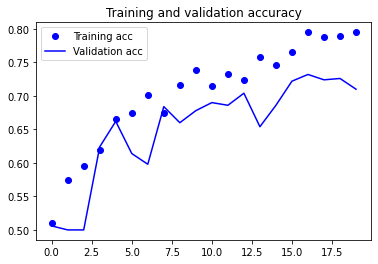

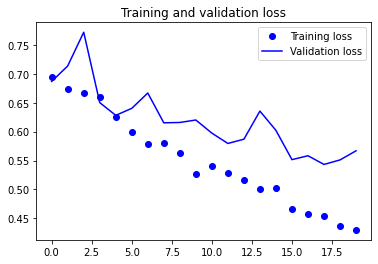

Val acc: 0.7116666436195374
Val loss: 0.5682384967803955
train_acc: 0.8230000138282776
train_loss: 0.41707396507263184


In [ ]:
#Building  Model 4 Network - training sample increased
warnings.filterwarnings("ignore")
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

random.seed(563)
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

# Configure Model: with the rmsprop optimizer and the binary_crossentropy loss function. 

model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data Preprocessing: decode JPEG format to RGB grid of pixels , convert to floating point tensor and rescaling the pixel values to [0,1]

# All images will be rescaled by 1./255
train_datagen4 = ImageDataGenerator(rescale=1./255)
test_datagen4 = ImageDataGenerator(rescale=1./255)

train_generator4 = train_datagen4.flow_from_directory(
        # This is the target directory
        train_dir4,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # binary labels
        class_mode='binary')

validation_generator4 = test_datagen4.flow_from_directory(
        validation_dir4,
        target_size=(150, 150),# All image will be resized to 150*150
        batch_size=20,
        class_mode='binary') # binary labels

for data_batch, labels_batch in train_generator4:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

    random.seed(999)
history4 = model4.fit_generator(
      train_generator4,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator4,
      validation_steps=25)

# Plotting the loss and accuracy of the model over the training and validation data during training:

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc4))

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss4, 'bo', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation
val_loss4, val_acc4 = model4.evaluate_generator(validation_generator4, steps=50)
print('Val acc:', val_acc4)
print('Val loss:', val_loss4)
train_loss4, train_acc4 = model4.evaluate_generator(train_generator4, steps=50)
print('train_acc:',train_acc4)
print('train_loss:',train_loss4)

**Observation:**
+ We can see the signs of overfitting based on the above.
 + Training accuracy increases linearly over time, until it reaches 80%, while our validation accuracy stalls at 73%. Difference of 7%.
 + Validation loss and Training loss shows a difference of 9%

+ We will be using  regularization techniques with data augmentation to solve the problem of overfitting.



**4.4 Reduce Overfitting**
+ Data Augmentation is used almost universally when processing images with deep learning models.
 + Some of the popular image augmentation techniques are flipping, translation, rotation, scaling, changing brightness, adding noise .
 
By using data augmentation a lot of similar images can be generated. This helps in increasing the dataset size and thus reduce overfitting.

Found 2500 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 10s 191ms/step - loss: 0.6987 - acc: 0.5093 - val_loss: 0.6975 - val_acc: 0.4820
Epoch 2/20
50/50 [==============================] - 9s 184ms/step - loss: 0.6951 - acc: 0.4915 - val_loss: 0.6889 - val_acc: 0.5380
Epoch 3/20
50/50 [==============================] - 9s 184ms/step - loss: 0.6910 - acc: 0.5101 - val_loss: 0.6826 - val_acc: 0.5560
Epoch 4/20
50/50 [==============================] - 9s 184ms/step - loss: 0.6822 - acc: 0.5622 - val_loss: 0.6775 - val_acc: 0.5620
Epoch 5/20
50/50 [==============================] - 9s 187ms/step - loss: 0.6764 - acc: 0.5749 - val_loss: 0.6744 - val_acc: 0.5740
Epoch 6/20
50/50 [==============================] - 9s 187ms/step - loss: 0.6771 - acc: 0.5513 - val_loss: 0.6904 - val_acc: 0.5440
Epoch 7/20
50/50 [==============================] - 9s 185ms/step - loss: 0.6737 - acc: 0.5852 - val_loss: 0.6683 - val_acc:

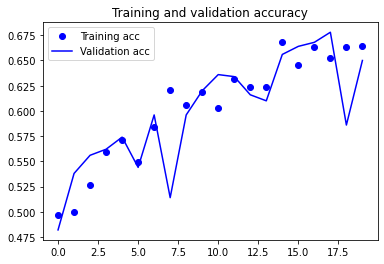

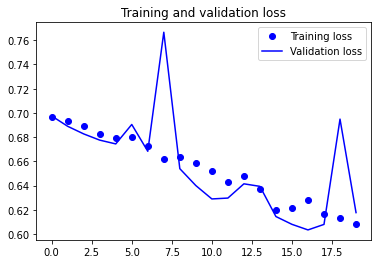

Val acc: 0.6549999713897705
Val loss: 0.6109170317649841
train_acc: 0.6930000185966492
train_loss: 0.5832366347312927
Found 400 images belonging to 2 classes.
test acc: 0.6499999761581421
test loss: 0.6472764611244202


In [ ]:
# model 4 data augumentation

warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

random.seed(888)

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


random.seed(44)
train_datagen4 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented! #why?
test_datagen4 = ImageDataGenerator(rescale=1./255)

train_generator4 = train_datagen4.flow_from_directory(
        # This is the target directory
        train_dir4,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator4 = test_datagen4.flow_from_directory(
        validation_dir4,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history4 = model4.fit_generator(
      train_generator4,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator4,
      validation_steps=25)

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(len(acc4))

#Plotting  accuracy and loss for training and validation datset
plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss4, 'bo', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Loss and Accuracy evaluation on Validation data
val_loss4, val_acc4 = model4.evaluate_generator(validation_generator4, steps=50)
print('Val acc:', val_acc4)
print('Val loss:', val_loss4)
train_loss4, train_acc4 = model4.evaluate_generator(train_generator4, steps=50)
print('train_acc:',train_acc4)
print('train_loss:',train_loss4)

# Evaluating model on the test data
test_generator4 = test_datagen4.flow_from_directory(
        test_dir4,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss4, test_acc4 = model4.evaluate_generator(test_generator4, steps=50)
print('test acc:', test_acc4)
print('test loss:', test_loss4)


----
**Result**
+ Based on the above results  can see that the problem of overfitting has been reduced by using data augmentation and dropout techniques.
 + Training accuracy and loss are quite close to the validation accuracy and loss in the chart. 
 + We can see some improvement from the non-regularized model in terms of **overfitting**.
 + Validation accuracy = 65% and Validation loss=61%.
 + Test accuracy =65% and Test loss= 64.7%

+ The performance seems to **decrease** when we increased the size of training set from 2000.

+ Below bar charts displays the overall performance of the non-trained models for Validation and Test data.

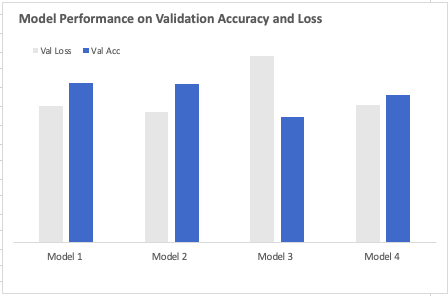


+ **Model Performance based on Test Data:**


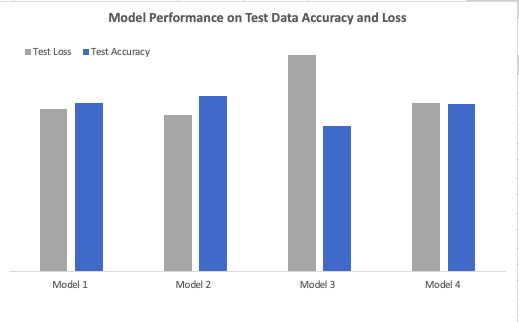

+ Model 2 with training sample size of 2000 has performed better than other non-trained models.This also explains that training sample size of 2000 brings the best results.



----
----

**Part 4.**  Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

**4.Pretrained Model**

Using a pre-trained convnet is a common and highly effective approach to deep learning on small image datasets is to leverage a pre-trained network. A pre-trained network is simply a saved network previously trained on a large dataset, typically on a large-scale image classification task like this .


 **VGG16 architecture**:

We will use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used convnet architecture for ImageNet. 

There are two ways to leverage a pre-trained network: feature extraction and fine-tuning. 
+ **Feature extraction**

 + Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. 
 + These features are then run through a new classifier, which is trained from scratch.

+ **Freezing layer/layers**
  + Before building and training the  model, we need to freeze the convolutional base.
  + It prevents  weights from getting updated during training.Otherwise representations that were previously learned by the convolutional base would get modified during training.


+ **Fine-tuning**
 + Fine tuning tchnique is complementary to feature extraction. It consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model.
 + It slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.




58892288/58889256 [==============================] - 0s 0us/step
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
50/50 [==============================] - 1s 5ms/step - loss: 0.7228 - acc: 0.5492 - val_loss: 0.5451 - val_acc: 0.7580
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5725 - acc: 0.7102 - val_loss: 0.4801 - val_acc: 0.7780
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.4686 - acc: 0.7930 - val_loss: 0.4335 - val_acc: 0.8100
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.3791 - acc: 0.8474 - val_loss: 0.4124 - val_acc: 0.8140
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.3479 - acc: 0.8525 - val_loss: 0.3733 - val_acc: 0.8440
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.3149 - acc: 0.8554 - val_loss: 0.3793 - val_acc: 0.8280
Epoch 7/30
50/50 [=============

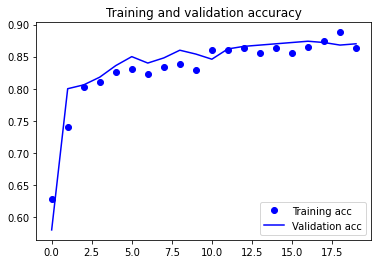

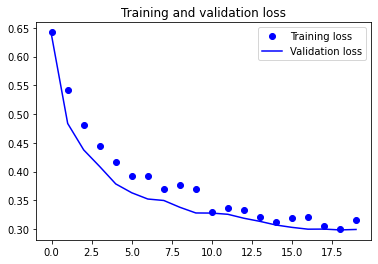

In [ ]:

warnings.filterwarnings("ignore")
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # weight checkpoint to initialize the model from
                  include_top=False, #It correspond to the 1000 classes from ImageNet.Not needed for this model.
                  input_shape=(150, 150, 3))#shape of the image tensors 

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1000)
validation_features, validation_labels = extract_features(validation_dir, 500)
test_features, test_labels = extract_features(test_dir, 500)

#The extracted features are currently of shape (samples, 4, 4, 512).

train_features = np.reshape(train_features, (1000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (500, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

#defining  densely-connected classifier using of dropout for regularization
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

random.seed(400)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
conv_base.trainable = False

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#conv_base.summary()
#Fine-tuning  the top 2 to 3 layers in the convolutional base
conv_base.trainable = True

#setting its trainable attribute to False for freezing the network
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

   



Let's take a look at the loss and accuracy curves during training:

Epoch 1/20
50/50 [==============================] - 10s 192ms/step - loss: 0.3300 - acc: 0.8516 - val_loss: 0.2882 - val_acc: 0.8720
Epoch 2/20
50/50 [==============================] - 9s 187ms/step - loss: 0.2483 - acc: 0.9026 - val_loss: 0.2925 - val_acc: 0.8900
Epoch 3/20
50/50 [==============================] - 10s 193ms/step - loss: 0.2657 - acc: 0.8882 - val_loss: 0.2747 - val_acc: 0.8940
Epoch 4/20
50/50 [==============================] - 9s 188ms/step - loss: 0.2401 - acc: 0.8899 - val_loss: 0.3007 - val_acc: 0.8960
Epoch 5/20
50/50 [==============================] - 9s 189ms/step - loss: 0.2259 - acc: 0.9077 - val_loss: 0.2608 - val_acc: 0.9080
Epoch 6/20
50/50 [==============================] - 10s 190ms/step - loss: 0.1921 - acc: 0.9263 - val_loss: 0.3009 - val_acc: 0.8800
Epoch 7/20
50/50 [==============================] - 10s 193ms/step - loss: 0.1784 - acc: 0.9232 - val_loss: 0.2667 - val_acc: 0.9140
Epoch 8/20
50/50 [==============================] - 9s 189ms/step - loss

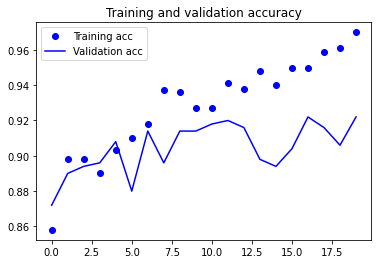

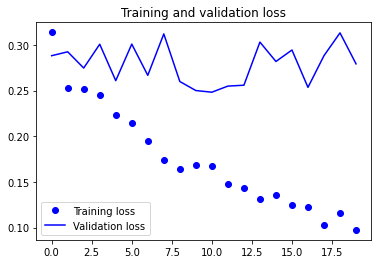

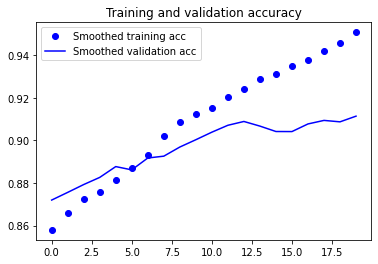

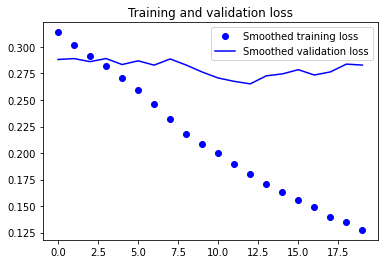

Val acc: 0.921999990940094
Val loss: 0.27923738956451416
Found 500 images belonging to 2 classes.
test acc: 0.921999990940094
test loss: 0.1811404824256897


In [ ]:
warnings.filterwarnings("ignore")
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plotting the loss and accuracy of training and Validation data
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# TO smooth the curves in the plot by replacing every loss and accuracy with exponential moving averages of these quantities. 
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of loss and accuracy

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print('Val acc:', val_acc)
print('Val loss:', val_loss)

# Evaluating model on the test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)


----
----
**Result:**
+ The performance has improved drastically by using pretrained model.
+ Validation accuracy= 92% and validation loss =27.9%
+ Test accuracy=92% and test loss =18%

+ Let's increase the training sample  and evaluate the performance (similar to model 2).
----
----

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 1s 3ms/step - loss: 0.5374 - acc: 0.7254 - val_loss: 0.2558 - val_acc: 0.8960
Epoch 2/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2470 - acc: 0.8976 - val_loss: 0.2027 - val_acc: 0.9160
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 0.1940 - acc: 0.9220 - val_loss: 0.1834 - val_acc: 0.9300
Epoch 4/30
100/100 [==============================] - 0s 2ms/step - loss: 0.1472 - acc: 0.9479 - val_loss: 0.1738 - val_acc: 0.9340
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.1114 - acc: 0.9648 - val_loss: 0.1634 - val_acc: 0.9360
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 0.1241 - acc: 0.9563 - val_loss: 0.1669 - val_acc: 0.9360
Epoch 7/30
100/100 [==============================] - 0s 2ms/step - loss: 0.1126 - a

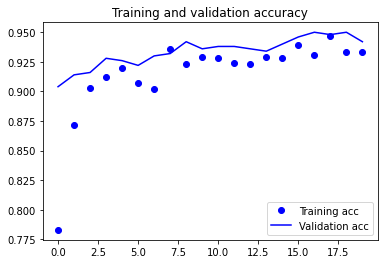

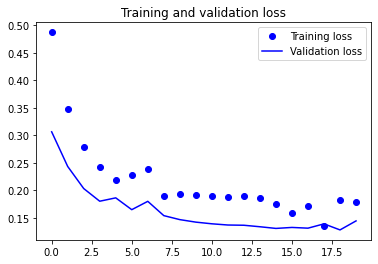

In [ ]:
# model 2

warnings.filterwarnings("ignore")
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
             #Note that since generators yield data indefinitely in a loop,
             #we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir2, 2000)
validation_features, validation_labels = extract_features(validation_dir2, 500)
test_features, test_labels = extract_features(test_dir2, 500)

#The extracted features are currently of shape (samples, 4, 4, 512).

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (500, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

#defining  densely-connected classifier using of dropout for regularization
model2 = models.Sequential()
model2.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

random.seed(400)
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()
conv_base.trainable = False

train_datagen2 = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        # This is the target directory
        train_dir2,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we ne ed binary labels
        class_mode='binary')

validation_generator2 = test_datagen2.flow_from_directory(
        validation_dir2,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator2,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator2,
      validation_steps=25,
      verbose=2)


acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

#Plot the accuracy and loss

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#conv_base.summary()
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Epoch 1/20
50/50 [==============================] - 10s 194ms/step - loss: 0.2286 - acc: 0.9094 - val_loss: 0.1423 - val_acc: 0.9420
Epoch 2/20
50/50 [==============================] - 10s 191ms/step - loss: 0.2046 - acc: 0.9087 - val_loss: 0.1374 - val_acc: 0.9500
Epoch 3/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1778 - acc: 0.9315 - val_loss: 0.1833 - val_acc: 0.9300
Epoch 4/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1534 - acc: 0.9359 - val_loss: 0.1682 - val_acc: 0.9200
Epoch 5/20
50/50 [==============================] - 9s 190ms/step - loss: 0.1683 - acc: 0.9321 - val_loss: 0.1314 - val_acc: 0.9480
Epoch 6/20
50/50 [==============================] - 9s 189ms/step - loss: 0.1402 - acc: 0.9449 - val_loss: 0.1273 - val_acc: 0.9420
Epoch 7/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1627 - acc: 0.9363 - val_loss: 0.1421 - val_acc: 0.9340
Epoch 8/20
50/50 [==============================] - 9s 189ms/step - loss: 

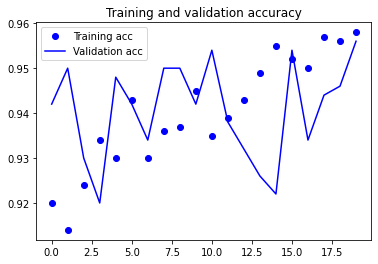

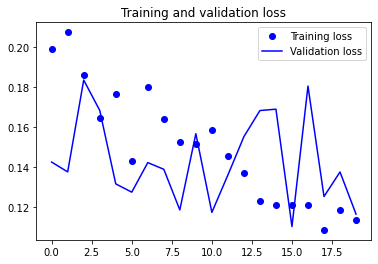

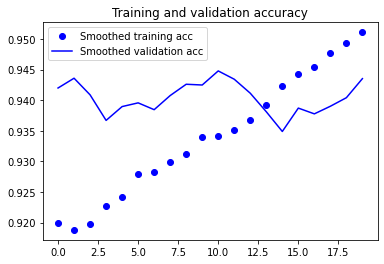

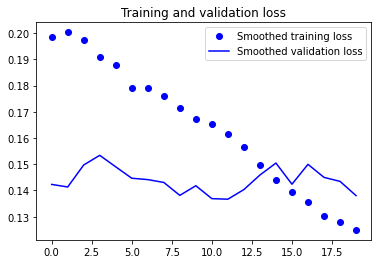

Val acc: 0.9559999704360962
Val loss: 0.11630378663539886
Found 500 images belonging to 2 classes.
test acc: 0.9240000247955322
test loss: 0.21160326898097992


In [ ]:

warnings.filterwarnings("ignore")

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator2,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator2,
      validation_steps=25)

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(len(acc2))

# plotting the loss and accuracy of training and validation data
plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# TO smooth the curves in the plot by replacing every loss and accuracy with exponential moving averages of these quantities. 
#def smooth_curve(points, factor=0.8):
  #smoothed_points = []
  #for point in points:
    #if smoothed_points:
      #previous = smoothed_points[-1]
      #smoothed_points.append(previous * factor + point * (1 - factor))
    #else:
      #smoothed_points.append(point)
  #return smoothed_points

plt.plot(epochs,
         smooth_curve(acc2), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc2), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss2), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss2), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of loss and accuracy

val_loss2, val_acc2 = model2.evaluate_generator(validation_generator2, steps=50)
print('Val acc:', val_acc2)
print('Val loss:', val_loss2)

# Evaluating model on the test data
test_generator2 = test_datagen2.flow_from_directory(
        test_dir2,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss2, test_acc2 = model2.evaluate_generator(test_generator2, steps=50)
print('test acc:', test_acc2)
print('test loss:', test_loss2)


----
----
**Result:**
+ Validate accuracy =95.5% and Validate loss=11.6%
+ Test accuracy=92.4% and test loss= 21%
+ Performance of the model has definately improved by increasing the training sample size by 1000 .(training sample size 2000)

+ Let's evaualate the performance by increasing the training sample little more further.
----
----

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
150/150 [==============================] - 1s 3ms/step - loss: 0.5097 - acc: 0.7414 - val_loss: 0.1961 - val_acc: 0.9160
Epoch 2/30
150/150 [==============================] - 0s 2ms/step - loss: 0.1625 - acc: 0.9383 - val_loss: 0.1710 - val_acc: 0.9220
Epoch 3/30
150/150 [==============================] - 0s 2ms/step - loss: 0.1181 - acc: 0.9551 - val_loss: 0.1632 - val_acc: 0.9200
Epoch 4/30
150/150 [==============================] - 0s 2ms/step - loss: 0.0963 - acc: 0.9660 - val_loss: 0.1597 - val_acc: 0.9280
Epoch 5/30
150/150 [==============================] - 0s 2ms/step - loss: 0.0792 - acc: 0.9705 - val_loss: 0.1593 - val_acc: 0.9240
Epoch 6/30
150/150 [==============================] - 0s 2ms/step - loss: 0.0755 - acc: 0.9722 - val_loss: 0.1589 - val_acc: 0.9300
Epoch 7/30
150/150 [==============================] - 0s 2ms/step - loss: 0.0834 - a

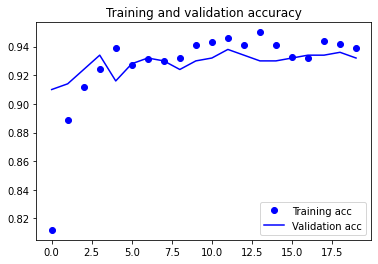

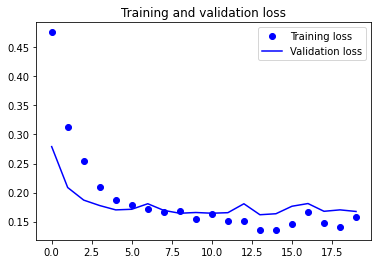

In [ ]:
warnings.filterwarnings("ignore")
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir3, 3000)
validation_features, validation_labels = extract_features(validation_dir3, 500)
test_features, test_labels = extract_features(test_dir3, 500)

#The extracted features are currently of shape (samples, 4, 4, 512).

train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (500, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

#defining  densely-connected classifier using of dropout for regularization
model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
random.seed(400)
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()
conv_base.trainable = False

train_datagen3 = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen3 = ImageDataGenerator(rescale=1./255)

train_generator3 = train_datagen3.flow_from_directory(
        # This is the target directory
        train_dir3,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we ne ed binary labels
        class_mode='binary')

validation_generator3 = test_datagen3.flow_from_directory(
        validation_dir3,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator3,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator3,
      validation_steps=25,
      verbose=2)


acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc3))

# plotting the loss and accuracy of training and Validation data

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Fine-tuning  the top 2 to 3 layers in the convolutional base

#conv_base.summary()
#The final feature map has shape (4, 4, 512). 
#That's the feature on top of which we will stick a densely-connected classifier.
conv_base.trainable = True
#Freezing the network 
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Epoch 1/20
50/50 [==============================] - 11s 194ms/step - loss: 0.2066 - acc: 0.9253 - val_loss: 0.1721 - val_acc: 0.9380
Epoch 2/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1769 - acc: 0.9212 - val_loss: 0.1658 - val_acc: 0.9400
Epoch 3/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1334 - acc: 0.9440 - val_loss: 0.1693 - val_acc: 0.9360
Epoch 4/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1557 - acc: 0.9434 - val_loss: 0.1559 - val_acc: 0.9380
Epoch 5/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1417 - acc: 0.9413 - val_loss: 0.1630 - val_acc: 0.9360
Epoch 6/20
50/50 [==============================] - 9s 188ms/step - loss: 0.1198 - acc: 0.9461 - val_loss: 0.1573 - val_acc: 0.9420
Epoch 7/20
50/50 [==============================] - 9s 189ms/step - loss: 0.1524 - acc: 0.9413 - val_loss: 0.1469 - val_acc: 0.9420
Epoch 8/20
50/50 [==============================] - 9s 189ms/step - loss: 0

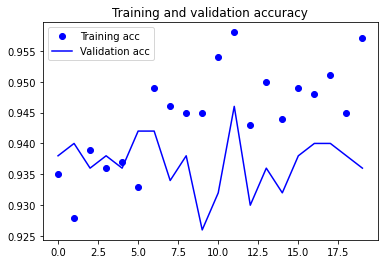

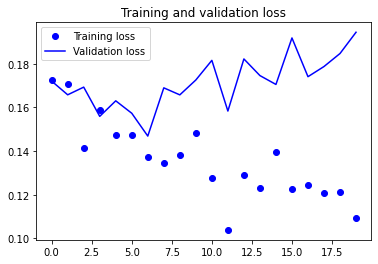

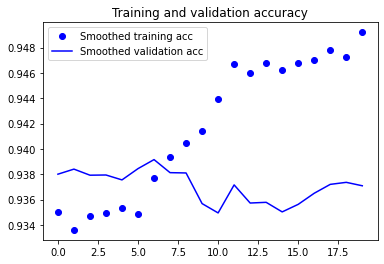

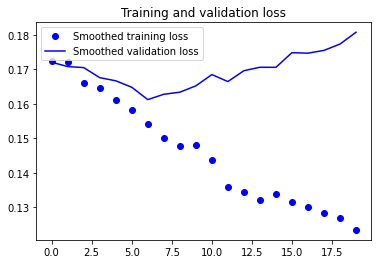

Val acc: 0.9359999895095825
Val loss: 0.19448092579841614
Found 500 images belonging to 2 classes.
test acc: 0.9240000247955322
test loss: 0.22402875125408173


In [ ]:
#model 3

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Fine tuning  with the RMSprop optimizer, using a very low learning rate. 


model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator3,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator3,
      validation_steps=25)

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc2))

# plotting the loss and accuracy of training and Validation data
plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# to smooth the curves in the plot by replacing every loss and accuracy with exponential moving averages of these quantities. 
#def smooth_curve(points, factor=0.8):
  #smoothed_points = []
  #for point in points:
    #if smoothed_points:
      #previous = smoothed_points[-1]
      #smoothed_points.append(previous * factor + point * (1 - factor))
    #else:
      #smoothed_points.append(point)
  #return smoothed_points

plt.plot(epochs,
         smooth_curve(acc3), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc3), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss3), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss3), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluation of loss and accuracy

val_loss3, val_acc3 = model3.evaluate_generator(validation_generator3, steps=50)
print('Val acc:', val_acc3)
print('Val loss:', val_loss3)

# Evaluating model on the test data
test_generator3 = test_datagen3.flow_from_directory(
        test_dir3,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss3, test_acc3 = model3.evaluate_generator(test_generator3, steps=50)
print('test acc:', test_acc3)
print('test loss:', test_loss3)



----

**Result:**

+ Validation Accuracy= 93% and Validation loss=19%
+ Test Accuracy = 92.4% and Test loss=22%.
+ The performance of the model is good , however , by increasing the sample size of Training to **3000** did'nt helped in improving the performance.


----
----



## **Summary Report:**
+ Convnets are the best type of machine learning models for computer vision tasks. We got descent results to train data from scratch even on a very small datasets.
+ Since "Cats and Dogs" dataset has  bigger images as compare MNIST so need to have more complex problem, it will have one more Conv2D + MaxPooling2D stage. 
It  augment the capacity of the network then to further reduce the size of the feature maps.Starting from inputs of size 150 × 150  to feature maps of size 7 × 7 just before the Flatten layer.

+ Due to size of the dataset , we always found issues related to overfitting.Data augmentation  and dropout were used to reduce overfitting and results were good in those terms.
+ Feature extraction are easy to use on existing convet, which helps solve the problem with smal dataset.
+  Fine-tuning also helps in pushing the performance bit further , even though it introduces to new problems.
+ Pretrained models with help of feature extraction and fine tuning helps in achieving overall higher performance than non -trained models.
+ Below is the bar chart to understand and analyze the performance of different models:

+ Overall Performance of the models on Test Data:


 Below chart depicts that performance of all Models(non-trained/pre-trained based on loss.

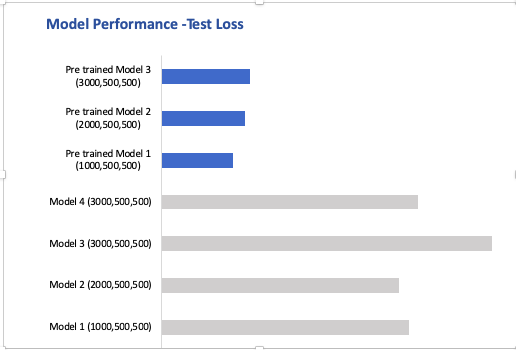

Next, we will look at the Accuracy comparison of the models based on the test data:


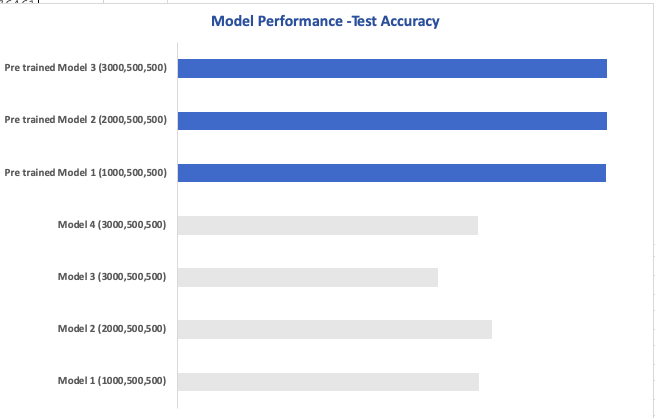
+ Pretrained model 2 has performed best among all the models, which has 2000 training samples by giving an accuracy of 92.4% and loss of 21%
+ Also, model 2 with training sample size=2000 has perform best among others non-pretrained models by giving an accuracy of 67.5%
+ Based on the above comparison bar charts, Pretrained models with help of feature extraction and fine tuning helps in achieving overall higher performance than non -trained models in the situations where we have less data available.



----
----



